In [154]:
from daftlistings import Daft
from daftlistings.enums import SearchType
from daftlistings.listing import Listing
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt

In [155]:
daft = Daft()

daft.set_location("Dublin City")
daft.set_search_type(SearchType.RESIDENTIAL_RENT)
daft.set_min_price(100)
daft.set_max_price(5000)
# daft.set_min_beds(4)
# daft.set_max_beds(4)

listings = daft.search()

Searching...
Search complete. Found 1044 listings.


In [156]:
def try_get_ber(listing: Listing):
    try:
        return listing.ber
    except:
        return None

def try_get_bedrooms(listing: Listing):
    try:
        return int(listing.bedrooms.split(" ")[0].split(",")[0])
    except:
        return None


def flatten_listing(listing: Listing):
    # try:
    return {
        # "agent_branch": listing.agent_branch,
        # "agent_id": listing.agent_id,
        # "agent_name": listing.agent_name,
        # "agent_seller_type": listing.agent_seller_type,
        # "as_dict": listing.as_dict,
        # "as_dict_for_mapping": listing.as_dict_for_mapping,
        "bathrooms": int(listing.bathrooms.split(" ")[0].split(",")[0])
        if listing.bathrooms
        else None,
        "bedrooms": try_get_bedrooms(listing),
        "ber": try_get_ber(listing),
        # "brochure": listing.brochure,
        # "category": listing.category,
        # "daft_link": listing.daft_link,
        # "distance_to": listing.distance_to,
        # "featured_level": listing.featured_level,
        # "has_brochure": listing.has_brochure,
        # "has_video": listing.has_video,
        # "has_virtual_tour": listing.has_virtual_tour,
        # "id": listing.id,
        # "images": listing.images,
        "latitude": listing.latitude,
        "longitude": listing.longitude,
        "monthly_price": listing.monthly_price,
        # "price": listing.price,
        # "publish_date": listing.publish_date,
        # "sale_type": listing.sale_type,
        # "sections": listing.sections,
        # "shortcode": listing.shortcode,
        # "size_meters_squared": listing.size_meters_squared,
        # "title": listing.title,
        # "total_images": listing.total_images,
        "is_apartment": "Apartments" in listing.sections
        or "Apartment" in listing.sections,
    }
    # except Exception as e:
    #     print(listing.as_dict())
    #     print(e)

In [157]:
df = pd.DataFrame(map(flatten_listing, listings))
df.to_csv("data.csv", index=False)
df

,bathrooms,bedrooms,ber,latitude,longitude,monthly_price,is_apartment
0,1.0,1.0,A2,53.289061,-6.233999,2150,True
1,2.0,2.0,A2,53.289061,-6.233999,2350,True
2,2.0,3.0,A2,53.289061,-6.233999,3200,True
3,1.0,1.0,A2,53.279347,-6.313134,1875,True
4,1.0,1.0,A3,53.347475,-6.233233,2501,True
...,...,...,...,...,...,...,...
1039,2.0,2.0,C1,53.342098,-6.314104,2144,True
1040,2.0,3.0,C3,53.335855,-6.280015,3250,False
1041,1.0,1.0,A2,53.242673,-6.191171,1875,True
1042,2.0,2.0,A2,53.242673,-6.191171,2250,True


<Axes: title={'center': 'Rent price map of Dublin'}, xlabel='longitude', ylabel='latitude'>

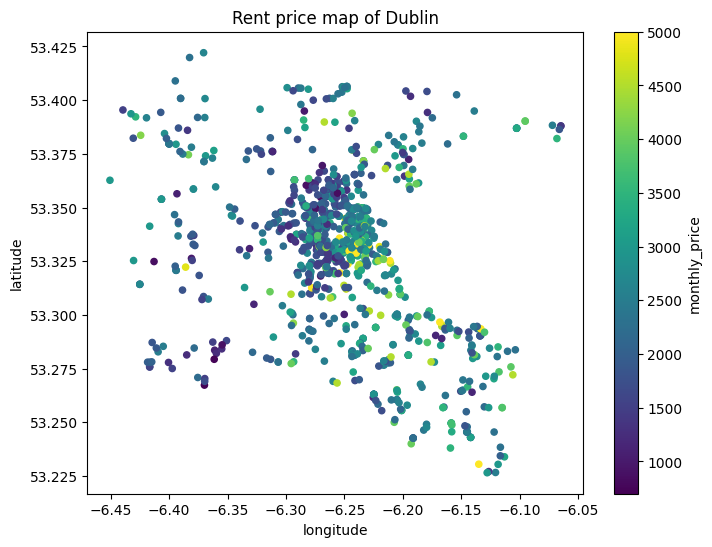

In [261]:
df.plot.scatter(x="longitude", y="latitude", c="monthly_price", colormap="viridis", title="Rent price map of Dublin", figsize=(8, 6))

Text(0.5, 1.0, 'Houses vs apartments')

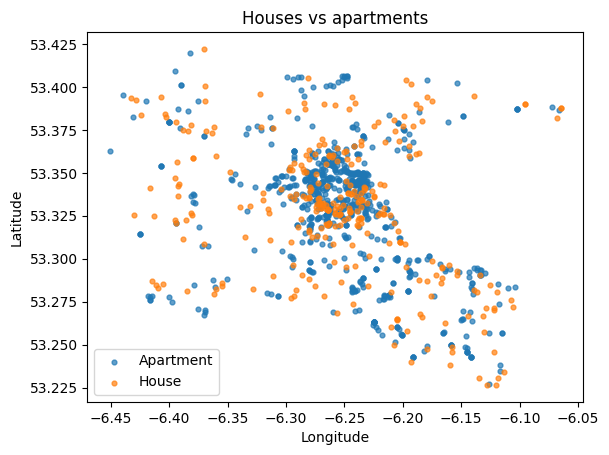

In [301]:
plt.scatter(
    df[df["is_apartment"]]["longitude"],
    df[df["is_apartment"]]["latitude"],
    s=12,
    label="Apartment",
    alpha=0.7,
    
)
plt.scatter(
    df[df["is_apartment"] == False]["longitude"],
    df[df["is_apartment"] == False]["latitude"],
    s=12,
    label="House",
    alpha=0.7,
)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figsize=(8, 8)
plt.title("Houses vs apartments")
# df[df["is_apartment"]].plot.scatter(
#     x="longitude",
#     y="latitude",
#     c="blue",
#     title="Houses vs apartments",
#     figsize=(8, 6),
#     label="Apartment",
# )
# df[df["is_apartment"] == False].plot.scatter(
#     x="longitude",
#     y="latitude",
#     c="red",
#     title="Houses vs apartments",
#     figsize=(8, 6),
#     label="House",
# )

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [213]:
X = df.dropna()[["longitude", "latitude", "bedrooms", "bathrooms", "is_apartment"]]
y = df.dropna()["monthly_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [216]:
model.score(X_test, y_test)

0.5722009157489883

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
model = RandomForestRegressor()
param_grid = {
    # "bootstrap": [True],
    # "max_depth": [80, 90, 100, 110],
    "max_features": [2, 3, 4],
    # "min_samples_leaf": [3, 4, 5],
    # "min_samples_split": [8, 10, 12],
    "n_estimators": [3, 10, 50, 100, 200, 1000],
}

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [3, 10, 50, 100, 200, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [239]:
print(grid_search.best_params_)
grid_search.best_estimator_.score(X_test, y_test)

{'max_features': 2, 'n_estimators': 100}


0.5866968941220375

235 2047 3606.91
323 1704 2627.29
518 1914 2894.45


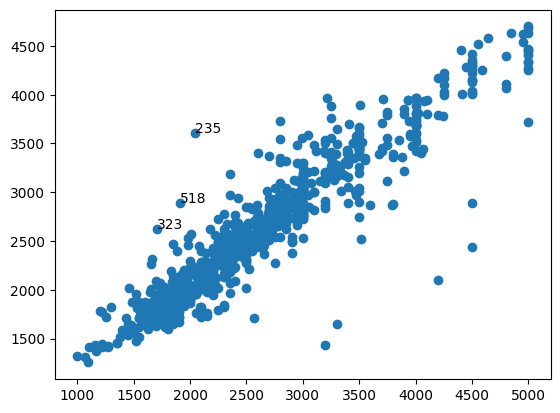

In [247]:
predictions = grid_search.best_estimator_.predict(X)
plt.scatter(y, predictions)
for index, (actual, predicted) in enumerate(zip(y, predictions)):
    if predicted / actual > 1.5:
        plt.annotate(index, (actual, predicted))
        print(index, actual, predicted)

In [168]:
model = LinearRegression().fit(X, y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

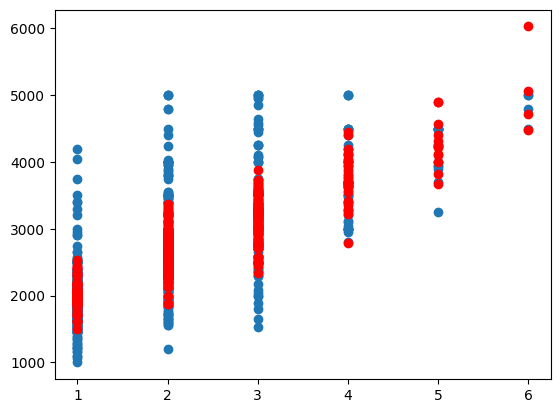

In [164]:
plt.plot(X["bedrooms"], y, "o")
plt.plot(X["bedrooms"], model.predict(X), "ro")

(1000.0, 6000.0)

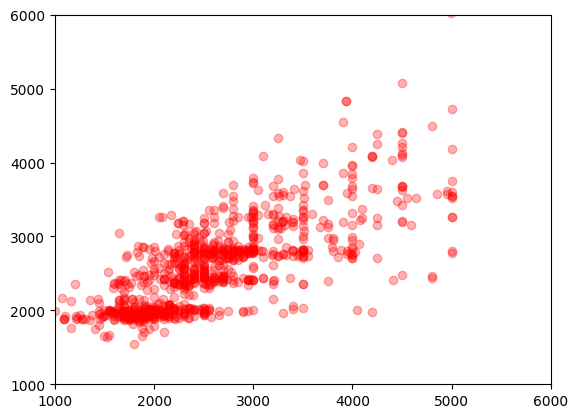

In [153]:
plt.plot( y, model.predict(X), "ro", alpha=0.3)
plt.xlim(1000, 6000)
plt.ylim(1000, 6000)
